<a href="https://colab.research.google.com/github/iraj259/Machine-Learning/blob/main/Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import numpy as np
import pandas as pd

In [46]:
df = pd.read_csv('placement.csv')

In [47]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [48]:
df.shape

(100, 4)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [50]:
# PREPROCESSING STAGE
# : before ',' means that we need all the rows and
# after ',' means that we need all except the first col.
df=df.iloc[:,1:]
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


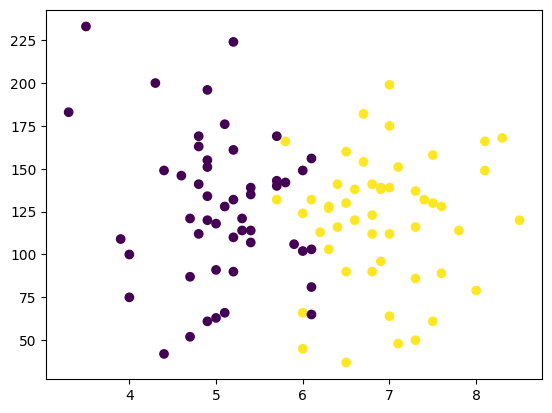

In [51]:
# EDA STAGE
# cdf means to add color to differntiate the selected ones
import matplotlib.pyplot as plt
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [52]:
# EXTRACT INPUT AND OUTPUT COLS
X=df.iloc[:,0:2]
Y=df.iloc[:,-1]

In [53]:
X.shape
Y.shape

(100,)

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,Y, test_size=0.1)

In [55]:
X_train

,cgpa,iq
22,4.9,120.0
75,4.8,169.0
16,5.2,224.0
77,7.3,50.0
26,7.0,199.0
...,...,...
9,5.1,66.0
74,6.7,154.0
27,6.0,124.0
37,8.1,149.0


In [56]:
y_train

,placement
22,0
75,0
16,0
77,1
26,1
...,...
9,0
74,1
27,1
37,1


In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
scaler = StandardScaler()

In [59]:
X_train = scaler.fit_transform(X_train)

In [60]:
X_train

array([[-9.95823335e-01, -1.35809811e-01],
       [-1.08617021e+00,  1.17761402e+00],
       [-7.24782709e-01,  2.65186525e+00],
       [ 1.17250167e+00, -2.01212956e+00],
       [ 9.01461043e-01,  1.98175105e+00],
       [ 1.89527667e+00,  1.09720031e+00],
       [ 8.11114168e-01,  3.46672411e-01],
       [-2.73048334e-01,  1.85845004e-01],
       [-1.26686396e+00,  5.61108954e-01],
       [ 9.01461043e-01,  1.33844142e+00],
       [-1.53790459e+00,  2.00855562e+00],
       [ 4.49726667e-01,  1.32235868e-01],
       [ 2.69032917e-01,  5.18221646e-02],
       [ 2.25666417e+00, -1.35809811e-01],
       [ 5.40073542e-01, -1.35809811e-01],
       [-1.08617021e+00,  4.27086115e-01],
       [ 4.49726667e-01, -2.36058894e+00],
       [ 9.91807918e-01,  6.95131794e-01],
       [-1.89929209e+00, -4.30660057e-01],
       [-5.44088959e-01, -4.84269193e-01],
       [-1.17651708e+00, -1.09005243e-01],
       [-9.95823335e-01,  1.90133735e+00],
       [ 3.59379792e-01,  4.27086115e-01],
       [ 9.

In [61]:
X_test = scaler.transform(X_test)

In [62]:
X_test

array([[-1.17651708e+00, -1.95852043e+00],
       [-2.26067959e+00,  2.89310636e+00],
       [-2.00770834e-03, -2.14615240e+00],
       [ 1.62423604e+00, -2.96637218e-01],
       [-9.95823335e-01, -1.71727932e+00],
       [-9.95823335e-01,  2.39454140e-01],
       [ 1.35319542e+00,  8.82763769e-01],
       [ 1.35319542e+00, -1.71727932e+00],
       [ 7.20767293e-01, -5.53961069e-02],
       [-6.34435834e-01, -1.09005243e-01]])

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
clf = LogisticRegression()

In [65]:
clf.fit(X_train, y_train)

LogisticRegression()

In [66]:
y_pred=clf.predict(X_test)

In [67]:
y_test

,placement
94,0
50,0
10,1
55,1
73,0
40,0
91,1
44,1
0,1
2,0


In [68]:
from sklearn.metrics import accuracy_score

In [69]:
accuracy_score(y_test,y_pred)

0.9

In [70]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

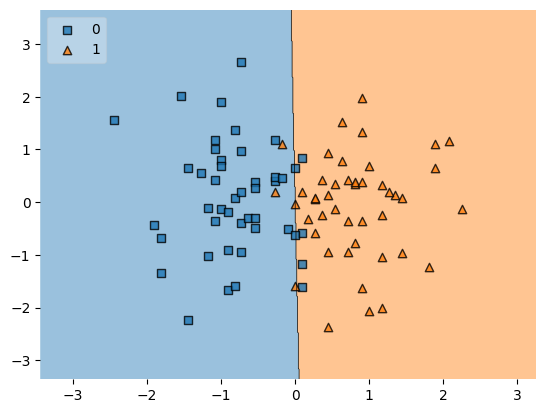

In [72]:
plot_decision_regions(X_train,y_train.values, clf=clf, legend=2)

In [73]:
import pickle

In [74]:
pickle.dump(clf,open('model.pkl','wb'))